# Ford Gobike Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
baywheels = pd.read_csv('202003-baywheels-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(baywheels.shape)

(176799, 14)


In [4]:
baywheels.describe()

duration_sec  start_station_id  start_station_latitude  \
count  176799.000000     110696.000000           176799.000000   
mean      861.590156        185.082261               37.732506   
std      1528.143090        154.647521                0.170476   
min        60.000000          3.000000                0.000000   
25%       374.000000         58.000000               37.763708   
50%       602.000000        125.000000               37.776598   
75%       963.000000        321.000000               37.789677   
max     84450.000000        521.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            176799.000000   111097.000000         176799.000000   
mean               -122.339595      179.244228             37.731290   
std                   0.336403      153.858017              0.278159   
min                -122.513814        3.000000              0.000000   
25%                -122.421339       53.000000             37.763848   
50%                -122.403969      121.000000             37.776598   
75%                -122.390648      309.000000             37.789747   
max                   0.000000      521.000000             37.995942   

       end_station_longitude        bike_id  
count          176799.000000  176799.000000  
mean             -122.335029  332033.876114  
std                 0.788013  310588.686471  
min              -122.529747      17.000000  
25%              -122.420377   11695.000000  
50%              -122.403234  299042.000000  
75%              -122.390648  551560.000000  
max                 0.000000  999960.000000

In [5]:
print(baywheels.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object


In [6]:
baywheels.head()

duration_sec                start_time                  end_time  \
0         35187  2020-03-31 20:42:10.0790  2020-04-01 06:28:37.8440   
1         14568  2020-03-31 22:45:25.5010  2020-04-01 02:48:13.7730   
2         35990  2020-03-31 15:08:22.3310  2020-04-01 01:08:12.9900   
3          1068  2020-03-31 23:55:00.4260  2020-04-01 00:12:49.0200   
4          3300  2020-03-31 23:00:55.6410  2020-03-31 23:55:56.6110   

   start_station_id                             start_station_name  \
0             462.0                     Cruise Terminal at Pier 27   
1              42.0  San Francisco City Hall (Polk St at Grove St)   
2             391.0                          1st St at Younger Ave   
3             456.0                    Arguello Blvd at Geary Blvd   
4               6.0                  The Embarcadero at Sansome St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.804648              -122.402087            24.0   
1               37.778650              -122.418230           370.0   
2               37.355030              -121.904436           397.0   
3               37.781468              -122.458806           107.0   
4               37.804770              -122.403234            24.0   

        end_station_name  end_station_latitude  end_station_longitude  \
0  Spear St at Folsom St             37.789677            -122.390428   
1    Jones St at Post St             37.787327            -122.413278   
2      Gish Rd at 1st St             37.361867            -121.909315   
3  17th St at Dolores St             37.763015            -122.426497   
4  Spear St at Folsom St             37.789677            -122.390428   

   bike_id user_type rental_access_method  
0    10982  Customer                  NaN  
1    12617  Customer                  NaN  
2    12812  Customer                  NaN  
3    12955  Customer                  NaN  
4    13050  Customer                  NaN

## Data Cleaning

In [7]:
#Check Duplicates values
sum(baywheels.duplicated())

0

In [8]:
#check missing values
baywheels.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [9]:
#dropping unuseful columns
baywheels.drop(labels = ['start_station_id','end_station_id','rental_access_method'],axis =1,inplace =True)

In [10]:
#check columns
baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_name       111349 non-null  object 
 4   start_station_latitude   176799 non-null  float64
 5   start_station_longitude  176799 non-null  float64
 6   end_station_name         111794 non-null  object 
 7   end_station_latitude     176799 non-null  float64
 8   end_station_longitude    176799 non-null  float64
 9   bike_id                  176799 non-null  int64  
 10  user_type                176799 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 14.8+ MB


In [11]:
#check missing values
baywheels.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [12]:
#drop missing values
baywheels.dropna(how = 'any',inplace = True)

In [13]:
#check missing values
baywheels.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [14]:
#check columns
baywheels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92892 entries, 0 to 174729
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             92892 non-null  int64  
 1   start_time               92892 non-null  object 
 2   end_time                 92892 non-null  object 
 3   start_station_name       92892 non-null  object 
 4   start_station_latitude   92892 non-null  float64
 5   start_station_longitude  92892 non-null  float64
 6   end_station_name         92892 non-null  object 
 7   end_station_latitude     92892 non-null  float64
 8   end_station_longitude    92892 non-null  float64
 9   bike_id                  92892 non-null  int64  
 10  user_type                92892 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 8.5+ MB


In [15]:
#fix datatypes
baywheels['start_time'] = pd.to_datetime(baywheels['start_time'])
baywheels['end_time'] = pd.to_datetime(baywheels['end_time'])

In [16]:
#check columns
baywheels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92892 entries, 0 to 174729
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             92892 non-null  int64         
 1   start_time               92892 non-null  datetime64[ns]
 2   end_time                 92892 non-null  datetime64[ns]
 3   start_station_name       92892 non-null  object        
 4   start_station_latitude   92892 non-null  float64       
 5   start_station_longitude  92892 non-null  float64       
 6   end_station_name         92892 non-null  object        
 7   end_station_latitude     92892 non-null  float64       
 8   end_station_longitude    92892 non-null  float64       
 9   bike_id                  92892 non-null  int64         
 10  user_type                92892 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 8.5+ MB


In [17]:
baywheels['bike_id'].value_counts()

9726      69
10303     68
12405     67
12956     57
12078     56
          ..
326296     1
240930     1
1977       1
7151       1
335804     1
Name: bike_id, Length: 7537, dtype: int64

### What is the structure of your dataset?

The Ford GoBike System Data is straightforward and intuitive to understand. This data has been collected efficiently, providing a collection of data to work with and draw conclusions.

This notebook uses data collected from Mars 2020 through April 2020. There were approximately 174729 bike rides.

The Data
Each trip is anonymized and includes:

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station Name
Start Station Latitude
Start Station Longitude
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how trip duration is dependent on other features such as: Trip Duration,start station, end station, user type, and Bike ID from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration will have the strongest effect on each the start stations and end stations becouse crowdness receive more rides. I also think that user_type, and Bike ID will have effects on trip duration

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: price.

In [18]:
#modifing data to make plots

baywheels_copy=baywheels.copy()
baywheels_copy['duration_min']=baywheels_copy['duration_sec']/60
baywheels_copy['duration_min']=baywheels_copy['duration_min'].astype(int)
baywheels_copy['start_time_month']=baywheels_copy.start_time.dt.month
baywheels_copy['start_time_day']=baywheels_copy.start_time.dt.day
baywheels_copy['start_time_day_name']=baywheels_copy['start_time'].dt.day_name()
baywheels_copy['start_time_hour']=baywheels_copy['start_time'].dt.hour


### Distribution of Trip Durations in seconds

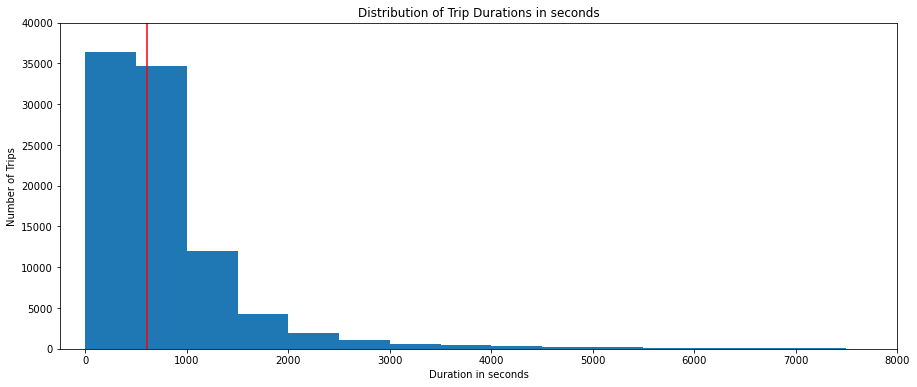

In [19]:
# plotting Distribution of Trip Durations in seconds

bins = np.arange(0, baywheels['duration_sec'].max()+250, 500)
plt.figure(figsize=[15, 6])
plt.hist(data = baywheels, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations in seconds')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.axis([-250, 8000, 0, 40000])
plt.axvline(baywheels['duration_sec'].median(), color='r');
plt.show()

### Distribution of Trip Durations in minitues

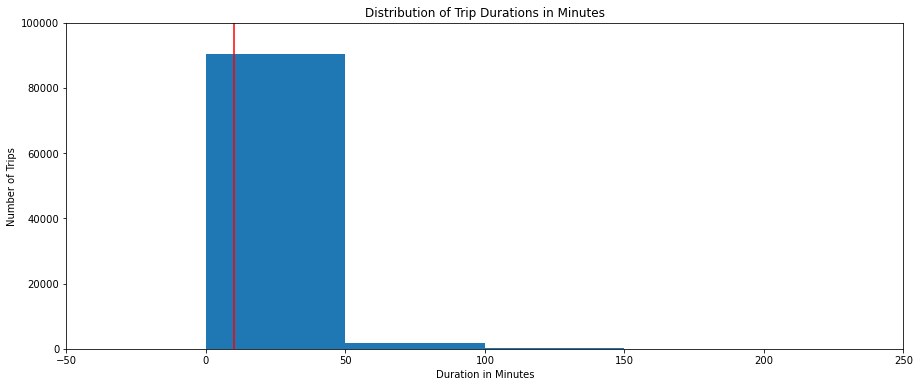

In [20]:
# plotting Distribution of Trip Durations in minitues

bins = np.arange(0, baywheels_copy['duration_min'].max()+50, 50)
plt.figure(figsize=[15, 6])
plt.hist(data = baywheels_copy, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Trips')
plt.axis([-50, 250, 0, 100000])
plt.axvline(baywheels_copy['duration_min'].median(), color='r');
plt.show()

### Log distribution of Trip Durations

<ipython-input-21-acb392beb5e9>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 20000, 0, 8000])


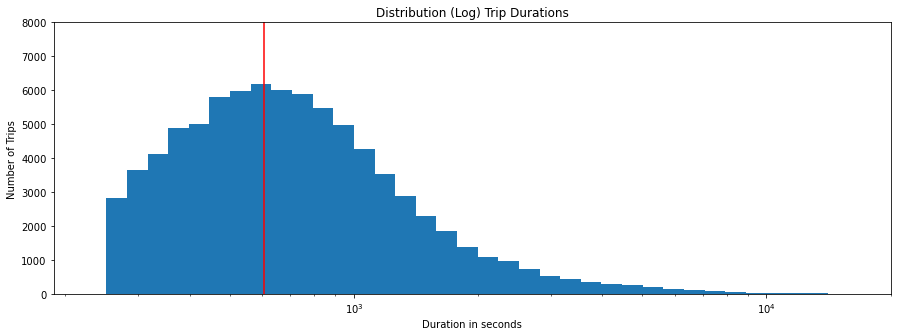

In [21]:
#plotting a long tail in the distribution of Trip Durations

bins_log = 10 ** np.arange(2.4, np.log10(baywheels_copy['duration_sec'].max()) +0.05 , 0.05)
plt.figure(figsize=[15, 5])
plt.hist(data = baywheels_copy, x = 'duration_sec', bins = bins_log)
plt.title('Distribution (Log) Trip Durations')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.axis([0, 20000, 0, 8000])
plt.axvline(baywheels_copy['duration_sec'].median(), color='r');


From the last three charts we can say that number of trips decreasing while duration of bike rent is increasing ,
the most frequently duration of bike rent is between (8-12) minutes

### Plotting types of users 

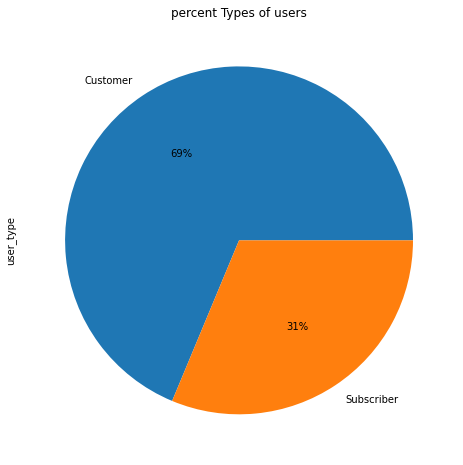

In [22]:
# plotting types of users 

baywheels_user=baywheels['user_type'].value_counts()
baywheels_user.plot(x=baywheels_user.index,y=baywheels_user,kind='pie',figsize=(15,8), autopct='%1.0f%%',textprops={'color':"black"});
plt.title('percent Types of users');

The majority of users are customers that mean : the user who use rent bikes continuously is under 31%

### Distribution of Trip Durations when (Start station = End station)

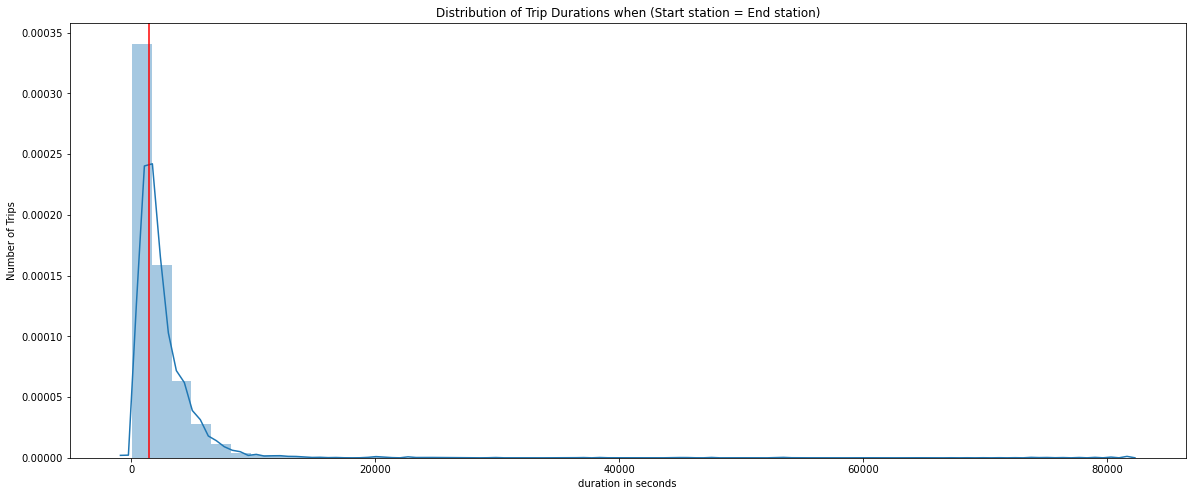

In [23]:
# Plotting Distribution of Trip Durations when (Start station = End station)

baywheels_start_end=baywheels[baywheels['start_station_name']==baywheels['end_station_name']]
plt.figure(figsize=[20, 8])
sb.distplot(baywheels_start_end['duration_sec'])
plt.title('Distribution of Trip Durations when (Start station = End station)')
plt.xlabel('duration in seconds')
plt.ylabel('Number of Trips')
plt.axvline(baywheels_start_end['duration_sec'].median(), color='r');

### Distribution of Trip Durations when (Start station = End station)

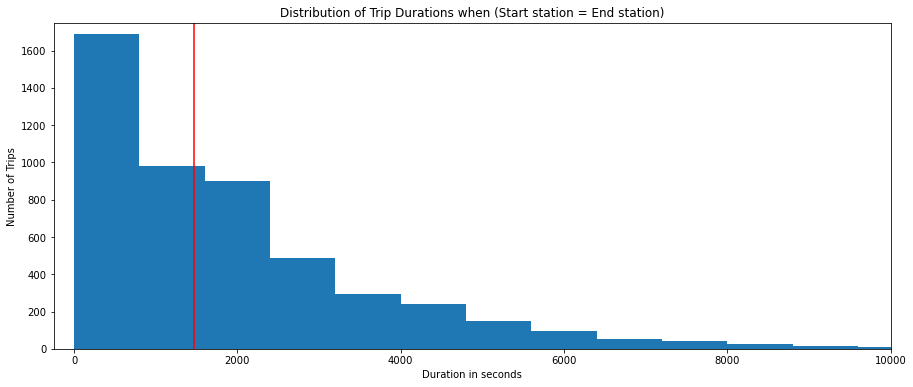

In [24]:
# Plotting Distribution of Trip Durations when (Start station = End station)

bins = np.arange(0, baywheels_start_end['duration_sec'].max()+250, 800)
plt.figure(figsize=[15, 6])
plt.hist(data = baywheels_start_end, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations when (Start station = End station)')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.axis([-250, 10000, 0, 1750])
plt.axvline(baywheels_start_end['duration_sec'].median(), color='r');

### Type of user when (Start station = End station)

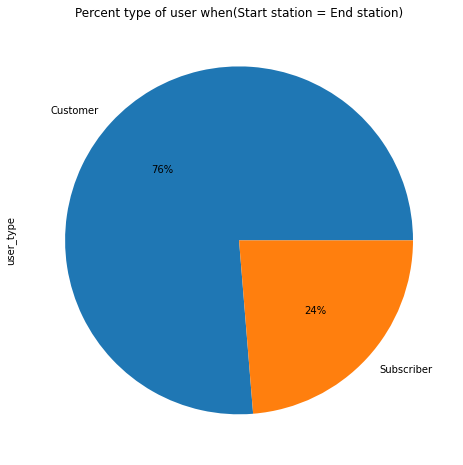

In [25]:
# Plotting type of user when (Start station = End station)

baywheels_start_end_user=baywheels_start_end['user_type'].value_counts()
baywheels_start_end_user.plot(x=baywheels_start_end_user.index,y=baywheels_start_end_user,kind='pie',figsize=(15,8), autopct='%1.0f%%',textprops={'color':"black"});
plt.title('Percent type of user when(Start station = End station)');

From the last three charts we can say that there are many trips that have the same of start station and end station , but the duration spent renting bike in nearly between(1500-1800) sec , that mean that user use it for sort distance that is under 30 minutes.
unlike the other trips that is used for short distance under 12 minutes

### Distribution of Trip through week days

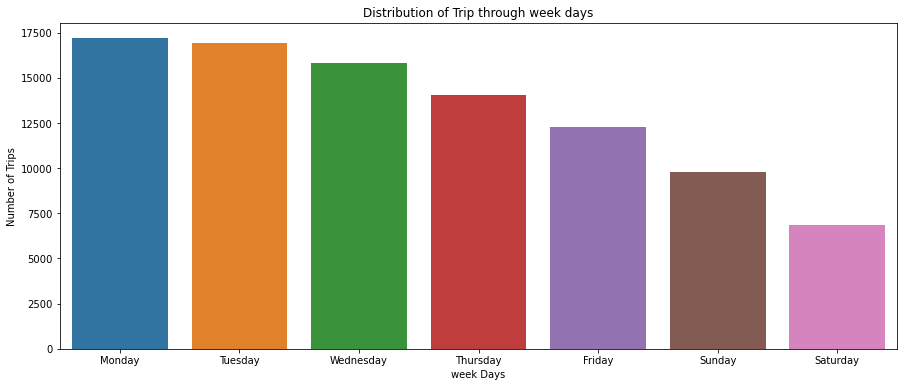

In [26]:
# Plotting Distribution of Trip through week days

base_color = sb.color_palette()[0]
start_time_day_name_order = baywheels_copy['start_time_day_name'].value_counts().index
plt.figure(figsize=[15, 6])
sb.countplot(data=baywheels_copy, x='start_time_day_name' , order = start_time_day_name_order)
plt.xlabel('week Days')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip through week days');

### Distribution of Trip through rent hours per day

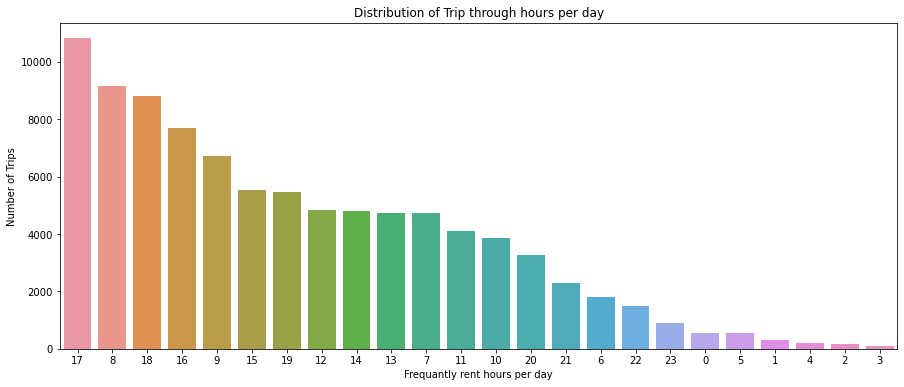

In [27]:
# Plotting Distribution of Trip through rent hours per day

base_color = sb.color_palette()[0]
start_time_hour_order = baywheels_copy['start_time_hour'].value_counts().index
plt.figure(figsize=[15, 6])
sb.countplot(data=baywheels_copy, x='start_time_hour' , order = start_time_hour_order)
plt.xlabel('Frequantly rent hours per day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip through hours per day');

From the last  chart we can say that the most frequenly trips of bike is in the middle of week ,
and the lowest least trips of bike is in holidays.
The highest hour renting bikes is between 8am to 8pm , specially at 5 pm

### Distribution of latitude through Trips

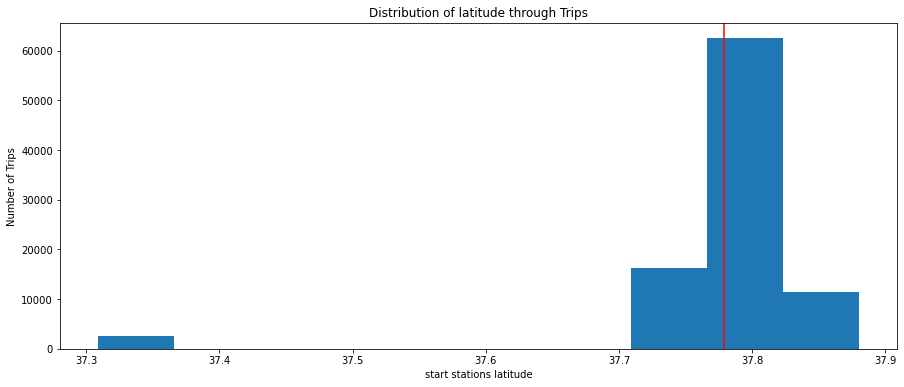

In [28]:
# Plotting Distribution of latitude through Trips

plt.figure(figsize=[15, 6])
plt.hist(data = baywheels, x = 'start_station_latitude')
plt.title('Distribution of latitude through Trips')
plt.xlabel('start stations latitude')
plt.ylabel('Number of Trips')
plt.axvline(baywheels['start_station_latitude'].median(), color='r');
plt.show()

### Distribution of longitude through Trips

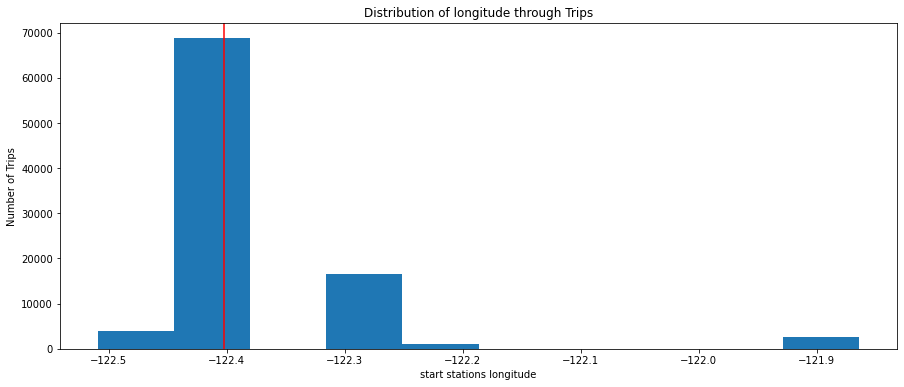

In [29]:
# Plotting Distribution of longitude through Trips

plt.figure(figsize=[15, 6])
plt.hist(data = baywheels, x = 'start_station_longitude')
plt.title('Distribution of longitude through Trips')
plt.xlabel('start stations longitude')
plt.ylabel('Number of Trips')
plt.axvline(baywheels['start_station_longitude'].median(), color='r');
plt.show()

From the last  two charts we can say that the most frequenly trips of bike is concentrated on samll area thatis between (37.7 - 37.9) latitude, and between (-120 - 125) longitude.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8am-8pm specially at 5pm during a day, there were more trips on work days (Mon-Fri) compared to weekends.


Most rides were quick and short, lasted between 6 to 12 minutes, though there were some very long outliers.

transformation was needed , due to the long outliers of duration in second in the data.

frequenly trips of bike is concentrated on samll area with small outliers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was bit strange because it concentrated in the left part of plot , so we transform it with log function on duration miutes to get out of wrong data .

the dataset wasn't tidy there was no duplicates but there was alot of  null data , and unimportant columns.
we have created new columns that contains subtypes of data to have a full view of datasets


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

### Distribution of Trip Duration per Start Stations

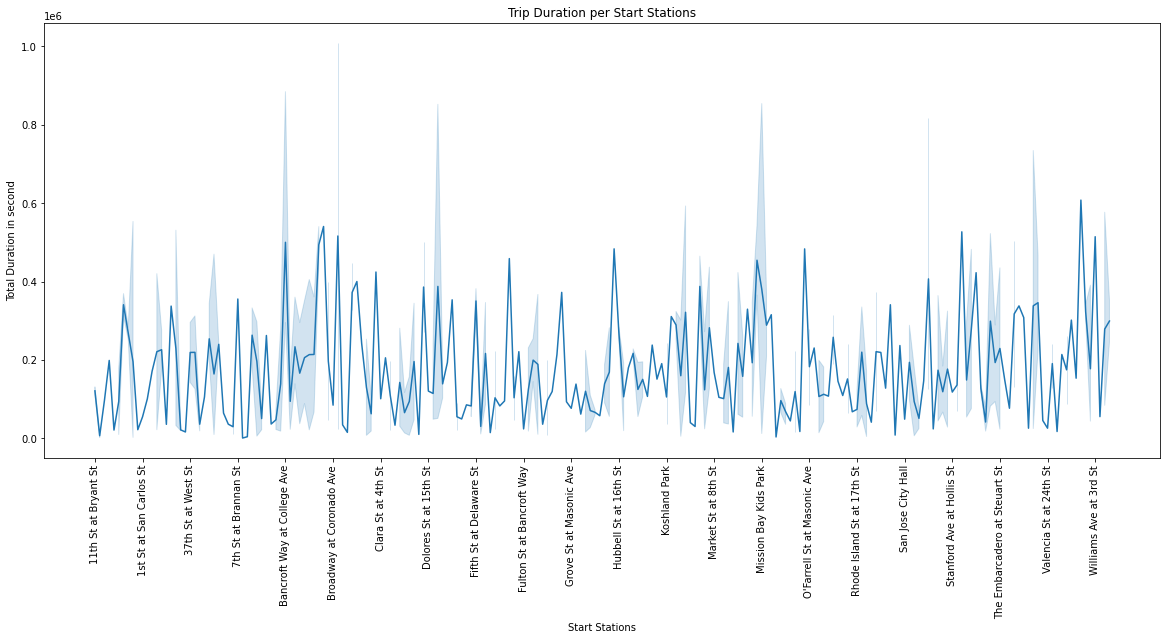

In [30]:
# Plotting Distribution of Trip Duration per Start Stations

S_total_duration = []
all_start_station = sorted(baywheels_copy.start_station_name.unique())
for x in all_start_station :
    S_total_duration.append(baywheels_copy[baywheels_copy.start_station_name == x].duration_sec.sum()) 
total_duration = pd.Series(S_total_duration)

plt.figure(figsize = [20, 8])
sb.lineplot(x = baywheels_copy['start_station_name'], y = total_duration)
plt.xticks(range(0, 220, 10),rotation=90)
plt.title('Trip Duration per Start Stations')
plt.xlabel('Start Stations')
plt.ylabel('Total Duration in second')
plt.show()

### Distribution of Trip Duration per End Stations

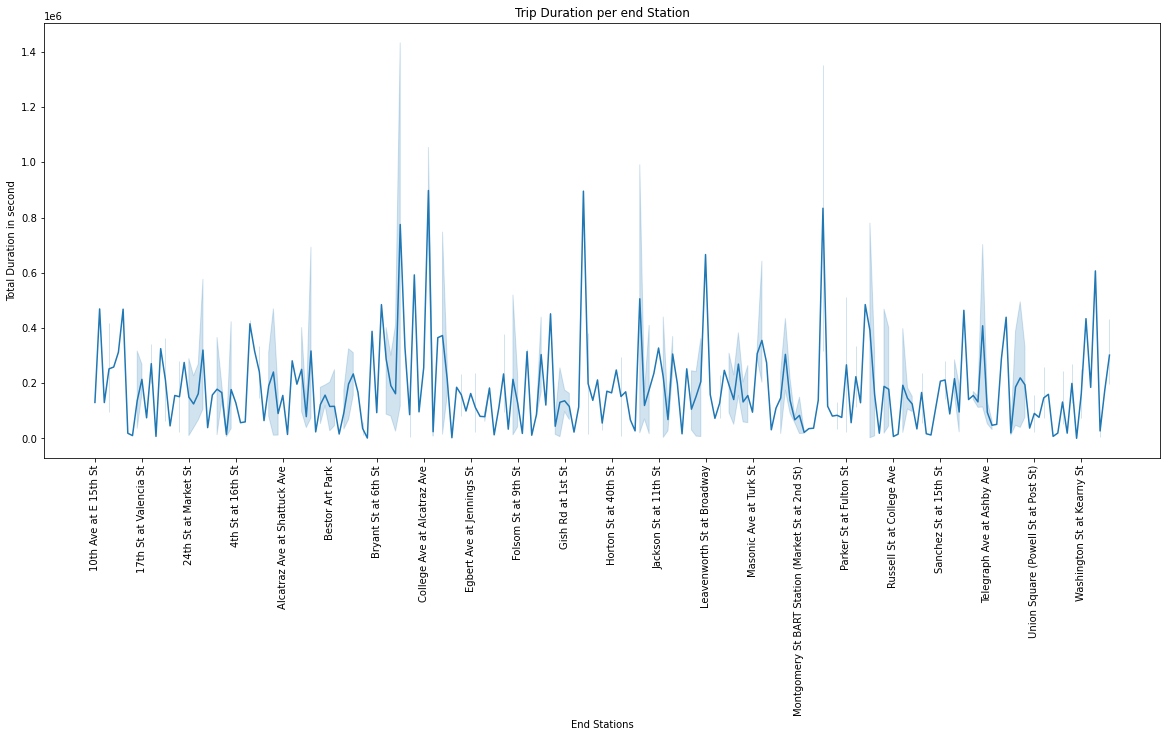

In [31]:
# Plotting Distribution of Trip Duration per End Stations

E_total_duration = []
all_end_station = sorted(baywheels_copy.end_station_name.unique())
for x in all_end_station :
    E_total_duration.append(baywheels_copy[baywheels_copy.end_station_name == x].duration_sec.sum()) 
total_duration = pd.Series(E_total_duration)

plt.figure(figsize = [20, 8])
sb.lineplot(x = baywheels_copy['end_station_name'], y = total_duration)
plt.xticks(range(0, 220, 10),rotation=90)
plt.title('Trip Duration per end Station')
plt.xlabel('End Stations')
plt.ylabel('Total Duration in second')
plt.show()

### Distribution of Duration on User Type

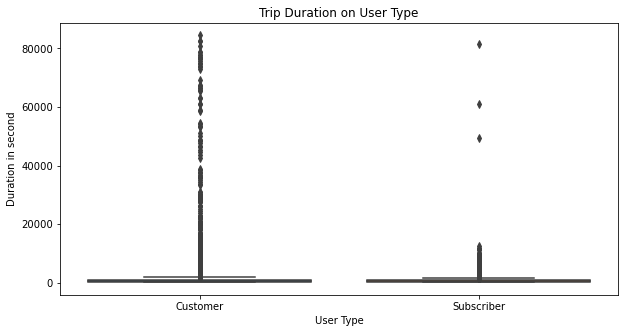

In [32]:
#plotting distribution of Duration on User Type

plt.figure(figsize = [10, 5])
sb.boxplot(data = baywheels_copy, x = 'user_type', y = 'duration_sec')
plt.title('Trip Duration on User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in second')
plt.show()

values are very widespread to see a box plot, so I need to trim duration to max 2500 second to get clearer chart.

### Distribution of Duration on User Type

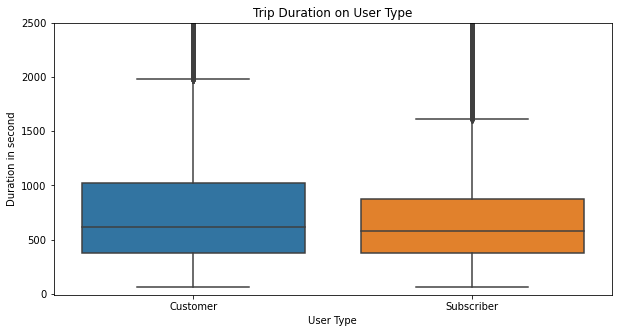

In [33]:
#plotting distribution of Duration on User Type

plt.figure(figsize = [10, 5])
sb.boxplot(data = baywheels_copy, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 2500])
plt.title('Trip Duration on User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in second')
plt.show()

we can say that higher percentage of customer make longer trips then subscriber but  number of subscriber riders are very high than customer.

### Distribution of Duration in minutes on User Type

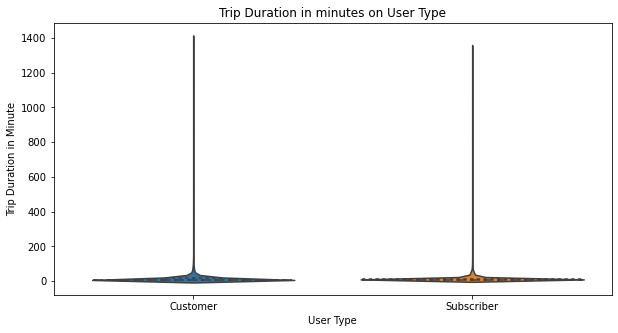

In [34]:
#plotting distribution of Duration in minutes on User Type

plt.figure(figsize = [10, 5])
sb.violinplot(data=baywheels_copy, x='user_type', y='duration_min', inner='quartile');
plt.title('Trip Duration in minutes on User Type')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

### Distribution of Duration in minutes on User Type with limit (100)

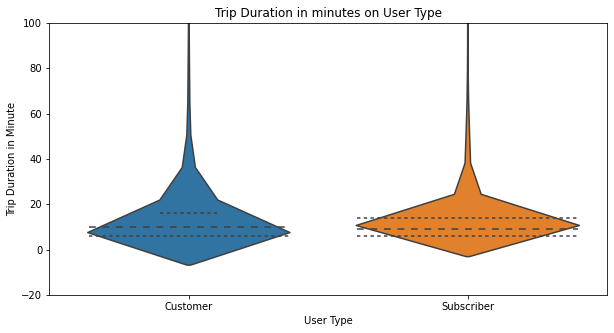

In [35]:
#plotting distribution of Duration in minutes on User Type

plt.figure(figsize = [10, 5])
sb.violinplot(data=baywheels_copy, x='user_type', y='duration_min', inner='quartile');
plt.ylim([-20, 100])
plt.title('Trip Duration in minutes on User Type')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is more narrower for subscribers than customers.
It seems subscribers make longer trips in time but number of subscribers in nearly half of customers.

### Distribution of user types trips pre week days

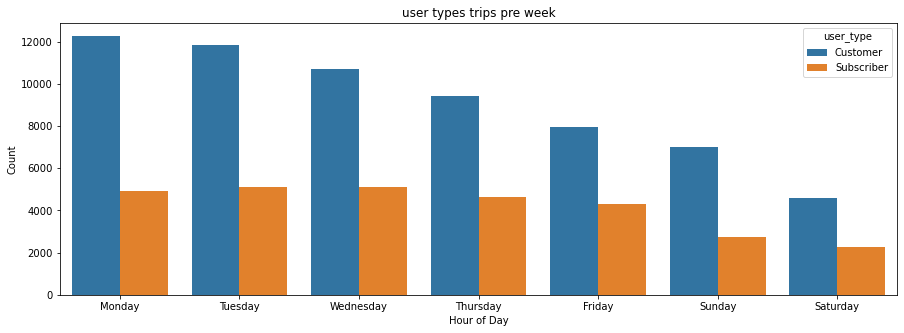

In [36]:
#plotting distribution of user types trips pre week

plt.figure(figsize = [15, 5])
start_time_day_name_order = baywheels_copy['start_time_day_name'].value_counts().index
sb.countplot(data=baywheels_copy, x='start_time_day_name', hue='user_type',order= start_time_day_name_order);
plt.title('user types trips pre week days')
plt.xlabel('Hour of Day');
plt.ylabel('Count');

filstly,because of the large differnce between customer trips and subscriper trips .
the highest trips from(monday to wednesday)for customers but from(monday to friday)for subscriper.
trips count is nearly to be the same from(monday to friday)for subscriper.
but there is a big difference between days for customers

### Distribution of user types trips per day hours

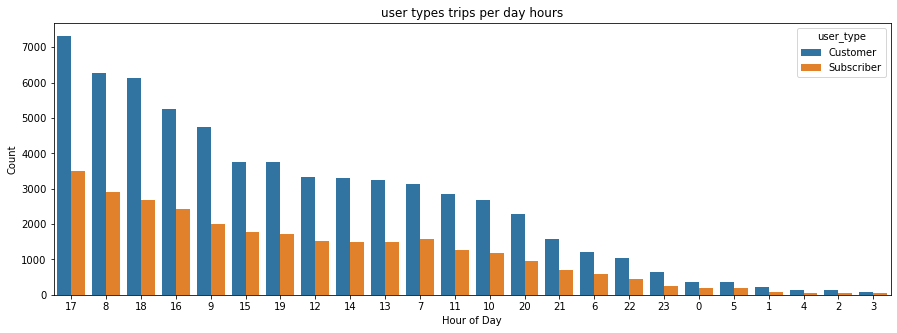

In [37]:
#plotting distribution of user types trips per day hours

plt.figure(figsize = [15, 5])
start_time_day_name_order = baywheels_copy['start_time_hour'].value_counts().index
sb.countplot(data=baywheels_copy, x='start_time_hour', hue='user_type',order= start_time_day_name_order);
plt.title('user types trips per day hours')
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. it is the same for customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot of subscriber usage than customers.
The trips varies a lot between subscribers and customers.
Subscribers use the bike for work so most trips were on work days (Mon-Fri) and specially during rush hours (when going to work in the morning and getting off work in the afternoon).
customers use bikes for fun in the afternoon or early evenings over weekends.
Subscriber are older than customer users who tend to take longer rides overall.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscriber are older than customer users who tend to take longer rides overall. , but take much shorter/quicker rides.
The hours of using bikes through week .so we should know much information about user .


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

### Hourly Usage through Weekdays for Customers and Subscribers

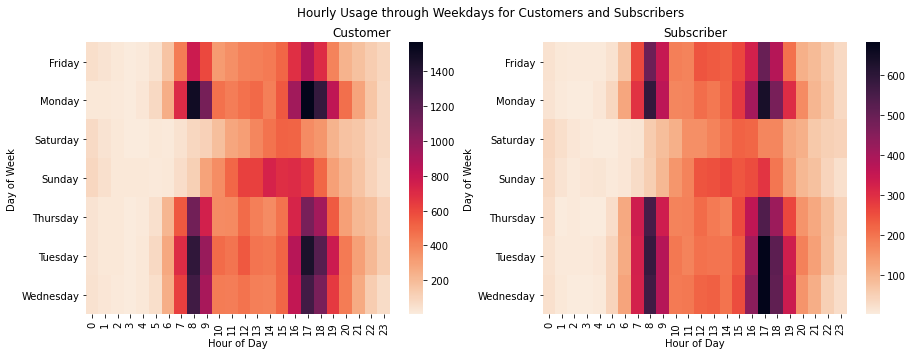

In [38]:
#plotting Hourly Usage through Weekdays for Customers and Subscribers

plt.figure(figsize = [15, 5])
plt.suptitle('Hourly Usage through Weekdays for Customers and Subscribers')
plt.subplot(1, 2, 1)
customers = baywheels_copy.query('user_type == "Customer"')
daycounts = customers.groupby(['start_time_day_name', 'start_time_hour']).size()
daycounts = daycounts.reset_index(name='count')
daycounts = daycounts.pivot(index='start_time_day_name', columns='start_time_hour', values='count')
sb.heatmap(daycounts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(1, 2, 2)
subscribers = baywheels_copy.query('user_type == "Subscriber"')
counts = subscribers.groupby(['start_time_day_name', 'start_time_hour']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='start_time_day_name', columns='start_time_hour', values='count')
sb.heatmap(counts, cmap='rocket_r');
plt.title('Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week'); 

it shows different usage between the two type of riders.
Subscribers use bikes on work days. Monday through Friday whereas customers ride a lot on weekends, specially in the afternoon.
Many trips concentrated between 8-9am and 17-18pm on work days for subscribers , customers tend to use in the late afternoon around 17pm Monday to Friday.

### Average duration on Weekdays for Customers and Subscribers

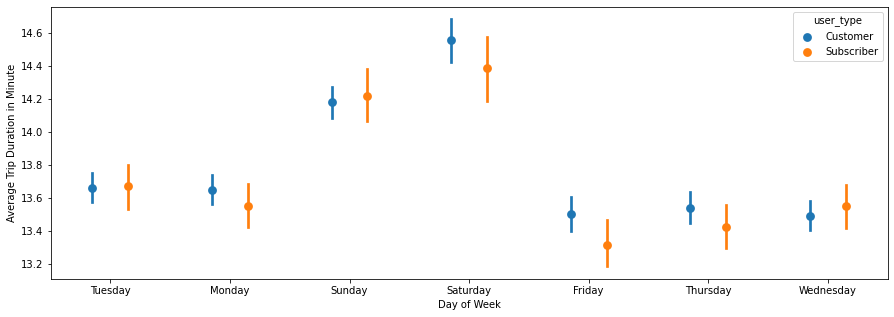

In [39]:
#plotting Average duration on Weekdays for Customers and Subscribers

plt.figure(figsize = [15, 5])
sb.pointplot(data=baywheels_copy, x='start_time_day_name', y='start_time_hour', hue='user_type', linestyles="" ,dodge=0.3,);
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minute');

### Duration on Hourly Usage for Customers and Subscribers

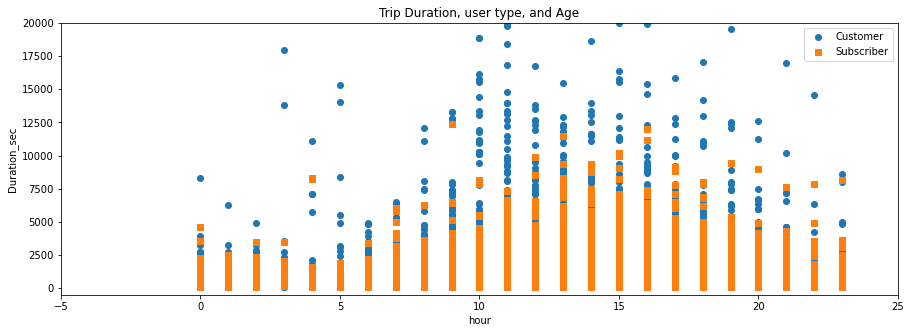

In [40]:
#plotting duration on Hourly Usage for Customers and Subscribers

plt.figure(figsize = [15, 5])
usertype = [['Customer', 'o'],['Subscriber', 's']]
for x, y in usertype:
    df_utype = baywheels_copy[baywheels_copy['user_type'] == x]
    plt.scatter((df_utype['start_time_hour']), df_utype['duration_sec'], marker = y, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.axis([-5, 25, -500, 20000 ])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('hour')
plt.ylabel('Duration_sec')
plt.show()

it shows different usage between the two type of riders.
Many trips concentrated between 8-9am and 17-18pm on work days for subscribers , customers tend to use in the late afternoon around 17pm Monday to Friday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon .


### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed.